In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import math


from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [2]:
Data ='Import-ekspor-banten.csv'
df =  pd.read_csv(Data,decimal=',')

In [3]:
df.head()

,Date,Nilai_Eksport,Nilai_Import,Volume_Import,Volume_Eksport,Neraca
0,2008-01,571.00,524.74,984.38,357.35,46.26
1,2008-02,553.56,605.54,1196.21,326.98,-51.98
2,2008-03,562.04,537.98,701.13,318.18,24.06
3,2008-04,596.84,632.99,1162.41,320.92,-36.15
4,2008-05,606.80,622.27,855.35,295.14,-15.47


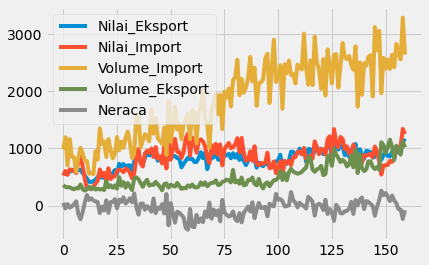

In [4]:
df.plot()
plt.show()

In [5]:
cdf = df[['Nilai_Eksport','Nilai_Import']]
cdf.head(10)

,Nilai_Eksport,Nilai_Import
0,571.00,524.74
1,553.56,605.54
2,562.04,537.98
3,596.84,632.99
4,606.80,622.27
5,632.39,609.13
6,639.67,566.36
7,616.88,765.14
8,625.20,864.41
9,570.86,685.29


In [6]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Neraca'])

#Converting the dataframe to a numpy array
dataset = data.values

#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)

In [7]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.68754666],
       [0.54373381],
       [0.65504824],
       [0.56690723],
       [0.59718054],
       [0.65387712],
       [0.72714497],
       [0.40279018],
       [0.2696491 ],
       [0.45231368],
       [0.69010847],
       [0.88956391],
       [0.76141471],
       [0.80502408],
       [0.74949862],
       [0.72540294],
       [0.70785086],
       [0.42527558],
       [0.5906955 ],
       [0.4912386 ],
       [0.75219218],
       [0.43260968],
       [0.70653335],
       [0.71455549],
       [0.78379763],
       [0.54565151],
       [0.76735811],
       [0.71347221],
       [0.83051046],
       [0.66902841],
       [0.72598849],
       [0.80868381],
       [0.70606491],
       [0.93004055],
       [0.58081422],
       [0.3860286 ],
       [0.6656029 ],
       [0.67406421],
       [0.50778059],
       [0.6043097 ],
       [0.54666159],
       [0.45979418],
       [0.8012326 ],
       [0.42599289],
       [0.56888349],
       [0.53505292],
       [0.65777108],
       [0.417

In [8]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.68754666, 0.54373381, 0.65504824, 0.56690723, 0.59718054,
       0.65387712, 0.72714497, 0.40279018, 0.2696491 , 0.45231368,
       0.69010847, 0.88956391, 0.76141471, 0.80502408, 0.74949862,
       0.72540294, 0.70785086, 0.42527558, 0.5906955 , 0.4912386 ,
       0.75219218, 0.43260968, 0.70653335, 0.71455549, 0.78379763,
       0.54565151, 0.76735811, 0.71347221, 0.83051046, 0.66902841,
       0.72598849, 0.80868381, 0.70606491, 0.93004055, 0.58081422,
       0.3860286 , 0.6656029 , 0.67406421, 0.50778059, 0.6043097 ,
       0.54666159, 0.45979418, 0.8012326 , 0.42599289, 0.56888349,
       0.53505292, 0.65777108, 0.41734128, 0.91453792, 0.11185607,
       0.68229129, 0.41890764, 0.1794001 , 0.46090674, 0.43755764,
       0.37866522, 0.30987689, 0.04533677, 0.        , 0.53107113])]
[0.07748386057882328]



In [9]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(68, 60, 1)

In [15]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
model.fit(x_train, y_train, batch_size=25, epochs=200)

Epoch 1/200
3/3 [==============================] - 2s 27ms/step - loss: 0.3032
Epoch 2/200
3/3 [==============================] - 0s 26ms/step - loss: 0.1380
Epoch 3/200
3/3 [==============================] - 0s 29ms/step - loss: 0.0428
Epoch 4/200
3/3 [==============================] - 0s 25ms/step - loss: 0.0587
Epoch 5/200
3/3 [==============================] - 0s 29ms/step - loss: 0.0364
Epoch 6/200
3/3 [==============================] - 0s 28ms/step - loss: 0.0299
Epoch 7/200
3/3 [==============================] - 0s 26ms/step - loss: 0.0367
Epoch 8/200
3/3 [==============================] - 0s 29ms/step - loss: 0.0372
Epoch 9/200
3/3 [==============================] - 0s 24ms/step - loss: 0.0315
Epoch 10/200
3/3 [==============================] - 0s 33ms/step - loss: 0.0286
Epoch 11/200
3/3 [==============================] - 0s 44ms/step - loss: 0.0293
Epoch 12/200
3/3 [==============================] - 0s 57ms/step - loss: 0.0299
Epoch 13/200
3/3 [==============================]

3/3 [==============================] - 0s 27ms/step - loss: 0.0242
Epoch 104/200
3/3 [==============================] - 0s 32ms/step - loss: 0.0243
Epoch 105/200
3/3 [==============================] - 0s 29ms/step - loss: 0.0251
Epoch 106/200
3/3 [==============================] - 0s 26ms/step - loss: 0.0242
Epoch 107/200
3/3 [==============================] - 0s 34ms/step - loss: 0.0236
Epoch 108/200
3/3 [==============================] - 0s 43ms/step - loss: 0.0234
Epoch 109/200
3/3 [==============================] - 0s 26ms/step - loss: 0.0237
Epoch 110/200
3/3 [==============================] - 0s 25ms/step - loss: 0.0236
Epoch 111/200
3/3 [==============================] - 0s 25ms/step - loss: 0.0232
Epoch 112/200
3/3 [==============================] - 0s 24ms/step - loss: 0.0235
Epoch 113/200
3/3 [==============================] - 0s 24ms/step - loss: 0.0237
Epoch 114/200
3/3 [==============================] - 0s 24ms/step - loss: 0.0234
Epoch 115/200
3/3 [=======================

In [24]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] 
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [25]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [26]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [27]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [28]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

132.9634731156458

<ipython-input-29-1cd39b7a1410>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


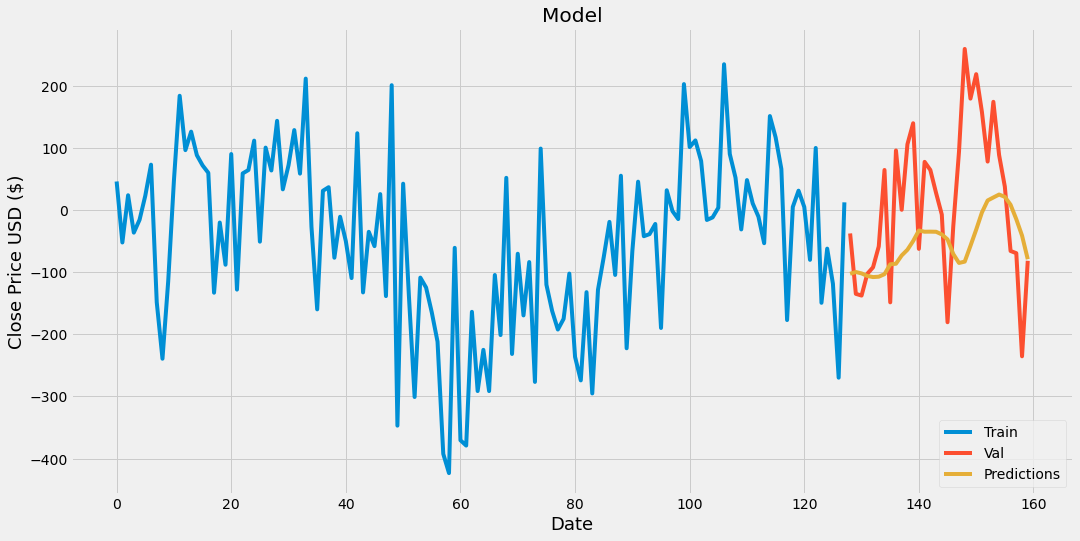

In [29]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Neraca'])
plt.plot(valid[['Neraca', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [30]:
valid

,Neraca,Predictions
128,-37.45,-102.382446
129,-134.72,-99.580009
130,-137.49,-101.814041
131,-102.40,-105.893799
132,-91.99,-107.707596
133,-58.27,-107.108864
134,64.77,-103.024994
135,-148.39,-87.138298
136,96.17,-86.217331
137,0.65,-72.881607


In [33]:
#Get the quote
datanew = pd.read_csv('Test.csv',decimal=',')
#Create a new dataframe
new_df = datanew.filter(['Neraca'])
#Get teh last 60 day closing price 
last_60_days = new_df[-30:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

ValueError: in user code:

    File "C:\Users\dwiah\anaconda3\lib\site-packages\keras\engine\training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\dwiah\anaconda3\lib\site-packages\keras\engine\training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\dwiah\anaconda3\lib\site-packages\keras\engine\training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\dwiah\anaconda3\lib\site-packages\keras\engine\training.py", line 1572, in predict_step
        return self(x, training=False)
    File "C:\Users\dwiah\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\dwiah\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 60, 1), found shape=(None, 30, 1)


In [32]:
#Get the quote
data2 = pd.read_csv('Test.csv')
print(data2['Neraca'])

0       46,26
1      -51,98
2       24,06
3      -36,15
4      -15,47
5       23,26
6       73,31
7     -148,26
8     -239,21
9     -114,43
10      48,01
11     184,26
12      96,72
13     126,51
14      88,58
15      72,12
16      60,13
17     -132,9
18      -19,9
19     -87,84
20      90,42
21    -127,89
22      59,23
23      64,71
24     112,01
25     -50,67
26     100,78
27      63,97
28     143,92
29      33,61
30      72,52
31     129,01
32      58,91
33     211,91
34     -26,65
35    -159,71
36      31,27
37      37,05
38     -76,54
39      -10,6
40     -49,98
41    -109,32
42     123,92
43    -132,41
44      -34,8
45     -57,91
46      25,92
47    -138,32
48     201,32
49       -347
50      42,67
51    -137,25
52    -300,86
53    -108,56
54    -124,51
55    -164,74
56    -211,73
57    -392,44
58    -423,41
Name: Neraca, dtype: object
